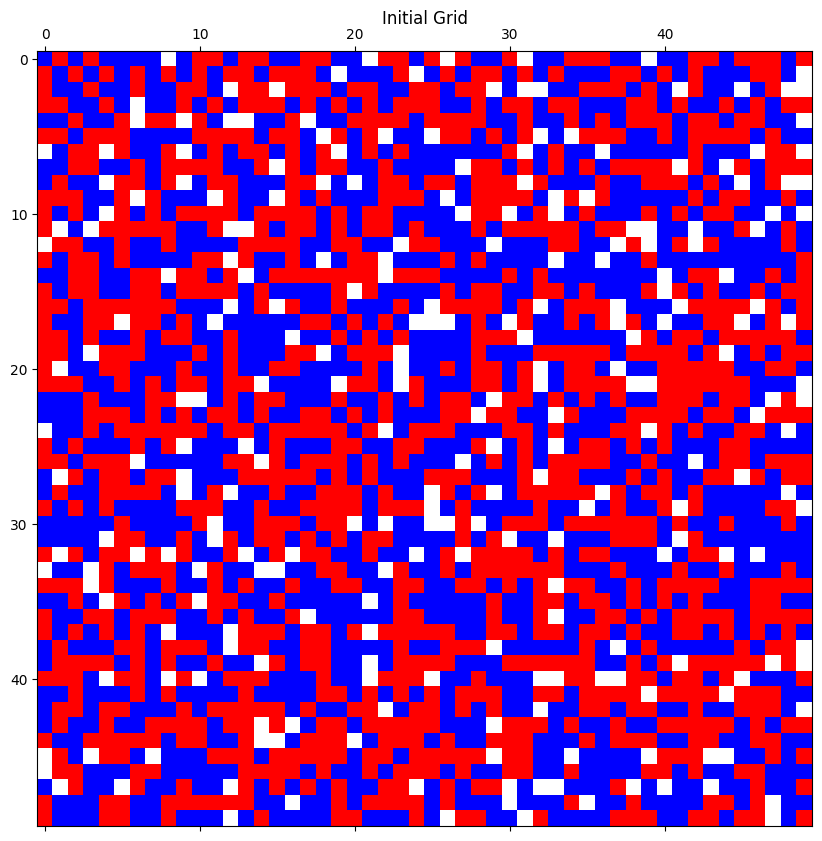

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

EMPTY = 0
RED = 1
BLUE = 2

RED_PERCENTAGE = .45
BLUE_PERCENTAGE = .45
EMPTY_PERCENTAGE = .1

# Размер сетки
n = 50

grid = np.zeros((n, n))

# Генерация списка с красными, синими и пустыми клетками
cells = [EMPTY] * round(n * n * EMPTY_PERCENTAGE) + [RED] * round(n * n * RED_PERCENTAGE) + [BLUE] * round(n * n * BLUE_PERCENTAGE)

np.random.shuffle(cells)

grid = np.reshape(cells, (n, n))

cmap = colors.ListedColormap(['white', 'red', 'blue'])

# Визуализация сетки
plt.figure(figsize=(10,10))
plt.matshow(grid, cmap=cmap, fignum=1)
plt.title('Initial Grid', pad=20)
plt.show()

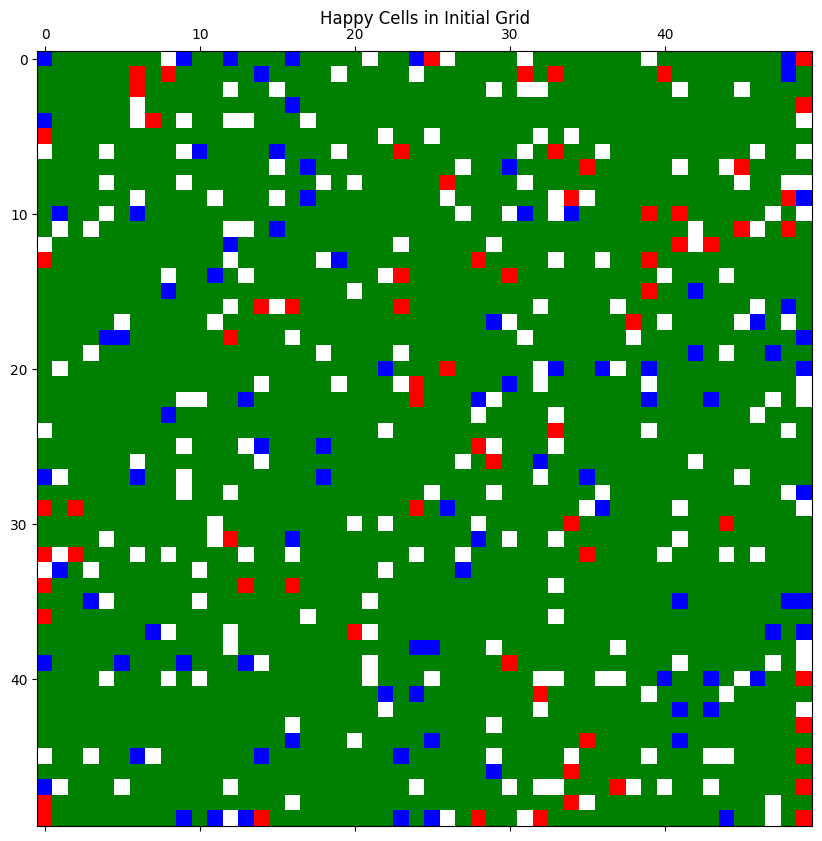

In [44]:
# Функция определения "счастья" клетки
def is_happy(grid, row, col):
    cell_color = grid[row, col]

    neighbors = [(row+i, col+j) for i in (-1, 0, 1) for j in (-1, 0, 1) if 0 <= row+i < n and 0 <= col+j < n and (i, j) != (0, 0)]

    same_color_neighbors = sum(grid[i, j] == cell_color for i, j in neighbors)

    return same_color_neighbors >= 2

# Визуализация "счастливых" клеток на начальном гриде
happy_grid = np.copy(grid)

for i in range(n):
    for j in range(n):
        if is_happy(grid, i, j):
            happy_grid[i, j] = 3 # 3 будет обозначать зеленый цвет

# Визуализация новой сетки
cmap = colors.ListedColormap(['white', 'red', 'blue', 'green'])
plt.figure(figsize=(10,10))
plt.matshow(happy_grid, cmap=cmap, fignum=1)
plt.title('Happy Cells in Initial Grid', pad=20)
plt.show()

In [46]:
# Функция выбора "несчастной" клетки и перемещения её в пустую
def move_unhappy_cell(grid):
    unhappy_cells = [(i, j) for i in range(n) for j in range(n) if grid[i, j] != EMPTY and not is_happy(grid, i, j)]
    empty_cells = [(i, j) for i in range(n) for j in range(n) if grid[i, j] == EMPTY]

    if not unhappy_cells or not empty_cells:
        return grid

    unhappy_cell = unhappy_cells[np.random.randint(len(unhappy_cells))]
    empty_cell = empty_cells[np.random.randint(len(empty_cells))]

    grid[empty_cell[0], empty_cell[1]] = grid[unhappy_cell[0], unhappy_cell[1]]
    grid[unhappy_cell[0], unhappy_cell[1]] = EMPTY

    return grid

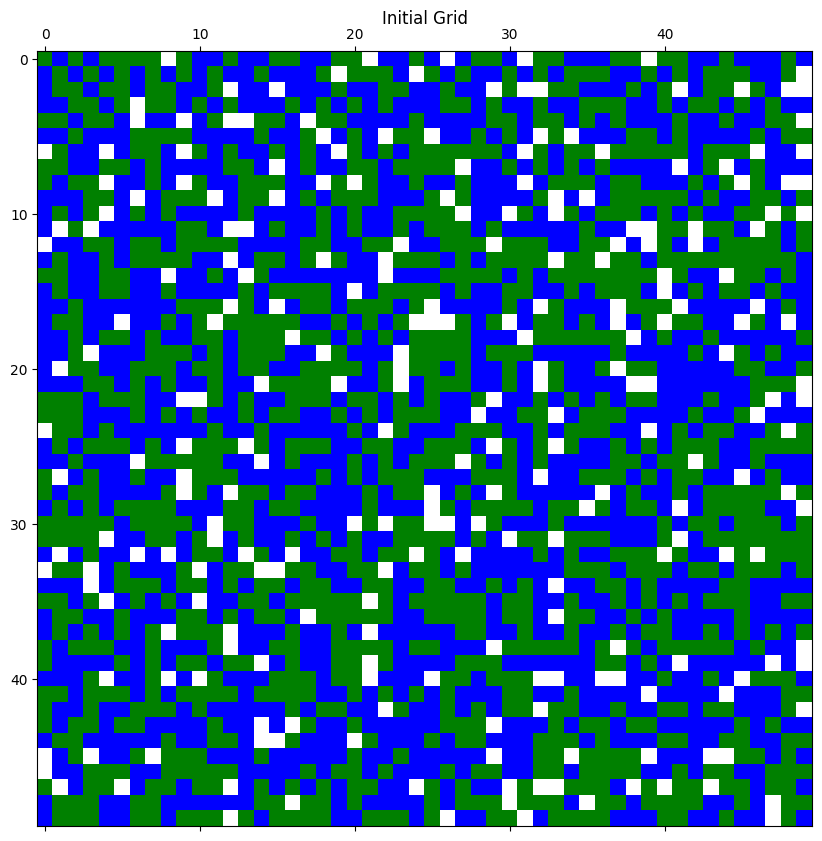

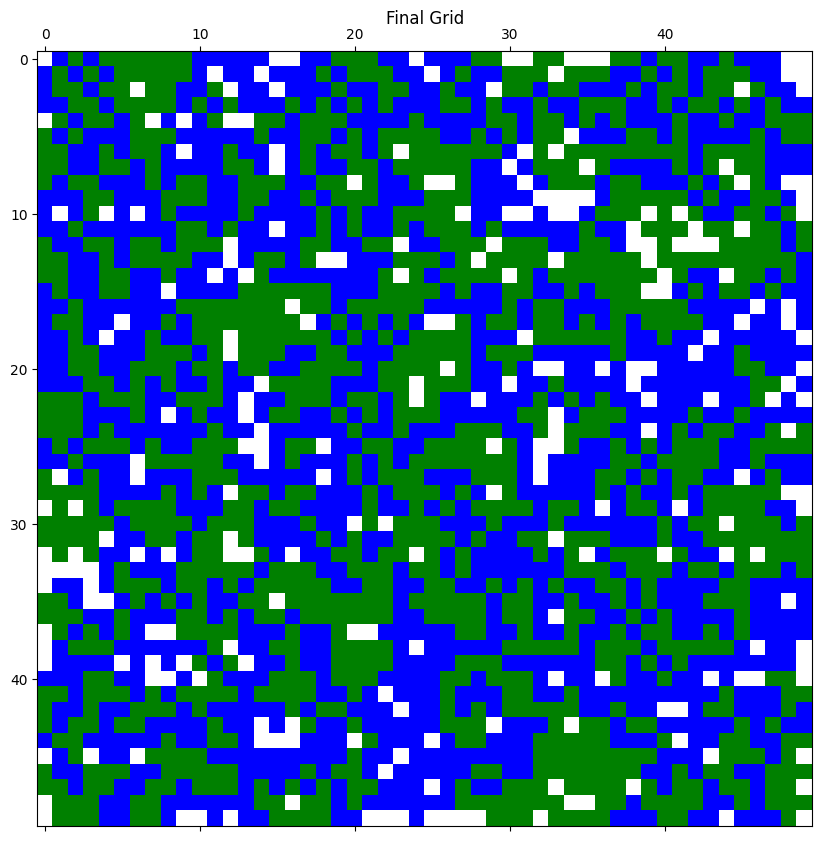

In [47]:
# Моделирование процесса

# Количество итераций равно квадрату размера сетки
iterations = n * n

# Визуализация начального состояния сетки
plt.figure(figsize=(10,10))
plt.matshow(grid, cmap=cmap, fignum=1)
plt.title('Initial Grid', pad=20)
plt.show()

# Запуск процесса моделирования
for _ in range(iterations):
    grid = move_unhappy_cell(grid)
    if all(is_happy(grid, i, j) for i in range(n) for j in range(n) if grid[i, j] != EMPTY):
        break

# Визуализация конечного состояния сетки
plt.figure(figsize=(10,10))
plt.matshow(grid, cmap=cmap, fignum=1)
plt.title('Final Grid', pad=20)
plt.show()
